# Introduction to Electrophysiology

The goal of this python notebook is to introduce some basic concepts of electrophysiology



## Local Field Potentials

Neurons are electrically active. As large groups of neurons synchronize this activity, their small electrical signals add up.

Let's set up a synthetic signal first, to see what kinds of things we can do with LFPs

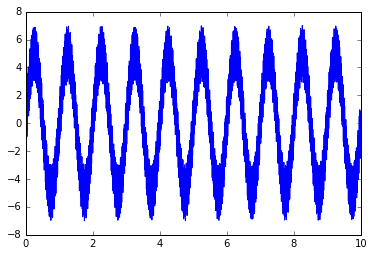

In [24]:
import numpy as np

t = np.linspace(0,10,2000) #we're setting up a time array from 0 to 10 seconds, with 1000 samples
fs = 1/((t[-1] - t[0]) / t.shape[0]) #we're finding the sampling rate directly from the t array

#now we set up a synthetic measured signal. we set this up in time domain first
y = 5 * np.sin(2 * np.pi * t) + 2 * np.sin(2 * np.pi * 60 * t)

import matplotlib.pyplot as plt #and import the plotting library
#we want the plots to show up in the notebook
%matplotlib inline 

plt.figure()
plt.plot(t,y) #plot our t vs y

plt.show() #show the figure



Now, to be honest, this doesn't look like any real LFP. If you saw this in your signal, you would quickly raise a red flag and try to figure out where this is coming from. One way to do that is to look at the *Fourier Domain* of the signal. We know the lights in our recording room are on the power grid, and we know the power grid uses 60Hz signals. Let's see if we have a peak at 60Hz

Our sampling rate is: 200.0


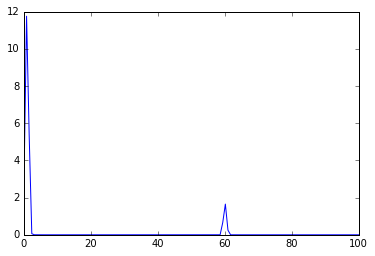

In [25]:
import scipy.signal as sig

print('Our sampling rate is: ' + str(fs))
F,Pxx = sig.welch(y,fs=fs)

plt.figure()
plt.plot(F,np.abs(Pxx))
plt.show()